## Newton Method

Este demo está extraido de: https://computationalthinking.mit.edu/Spring21/newton_method/
pero pasado a Jupyter. 

La primer parte está hecha para generar un enviroment (proyect) con todos los paquetes con su respectiva versión. Luego estos se borran al borrar el temp. 

In [1]:
#import Pkg
#Pkg.activate(mktempdir())
#Pkg.add([
#    Pkg.PackageSpec(name="ForwardDiff", version="0.10"),
#    Pkg.PackageSpec(name="Plots", version="1"),
#    Pkg.PackageSpec(name="LaTeXStrings", version="1"),
#    Pkg.PackageSpec(name="NonlinearSolve", version="0.3"),
#    Pkg.PackageSpec(name="StaticArrays", version="0.12")
#    ])
using ForwardDiff, Plots, LaTeXStrings, NonlinearSolve, StaticArrays

Vamos a hacer una versión gráfica del algoritmo de Newton-Raphson para ver como este converge a alguna de las raices de una función.

Recodemos que el método de Newton-Raphson se utiliza para encontrar raices de funciones 
(suficientemente suaves), es decir los valores $\{x^j\}$ donde $f(x^j) = 0$. 
El método requiere de un valor inicial $x_0$ y a partir del mismo define una sucesión de puntos
$\{x^j_i\}$ que convergen a la raíz $x^j$. *De ahora en más nos olvidaremos de las otras raices 
y pensaremos en una sola, a la que llamaremos $x$ y así no utilizaremos más el supra-
indice j.*

El algoritmo definiendo la sucesión es: 

$$
x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)},
$$
donde $f'$ la derivada de $f$.

La mejor manera de entender este ingenioso método es verlo gráficamente:

Primero definimos las líneas rectas que emplearemos para graficar las tangentes a las funciones:

In [2]:
straight(x0, y0, x, m) = m*(x-x0) + y0

straight (generic function with 1 method)

In [3]:
function standard_Newton(f, #función a encontrar la raíz
                         n, # número de iteracones
                         x_range, # rango para graficar 
                         x0, # valor inicial 
                         ymin=-10, ymax=10 #límites de integración
                        )
    
    # aquí usamos una librería para calcular la derivada automáticamente
    f′ = x -> ForwardDiff.derivative(f, x)

    #ploteamos la función 
	p = plot(f, x_range, lw=3, ylim=(ymin, ymax), legend=:false)
    # el punto inicial 
	scatter!([x0], [0], c="green", ann=(x0, -3, L"x_0", 10))
    # la línea del cero
	hline!([0.0], c="magenta", lw=3, ls=:dash)
    #comenzamos las iteraciones:
	for i in 1:n

		plot!([x0, x0], [0, f(x0)], c=:gray, alpha=0.5)
		scatter!([x0], [f(x0)], c=:red)
        #calculamos la tangente
		m = f′(x0)
        # graficamos la recta tangente 
		plot!(x_range, [straight(x0, f(x0), x, m) for x in x_range], c=:blue, alpha=0.5, ls=:dash, lw=2)
        #iteramos el paso (o sea encontramos el punto donde la recta corta el eje)
		x1 = x0 - f(x0) / m
		#scatter!([x1], [0], c="green", ann=(x1, -3, "x$i"))

		if i <= n
			scatter!([x1], [0], c="green", ann=(x1, -3, L"x_%$i", 10))
		end
		
		x0 = x1

	end

	#p |> as_svg
    display(p)

end

standard_Newton (generic function with 3 methods)

Ahora que tenemos una función para graficar el algoritmo lo aplicamos a varias funciones que definiremos a continuación. Note que las graficaremos para ver donde están aproximadamente los ceros previamente a aplicar el método. 

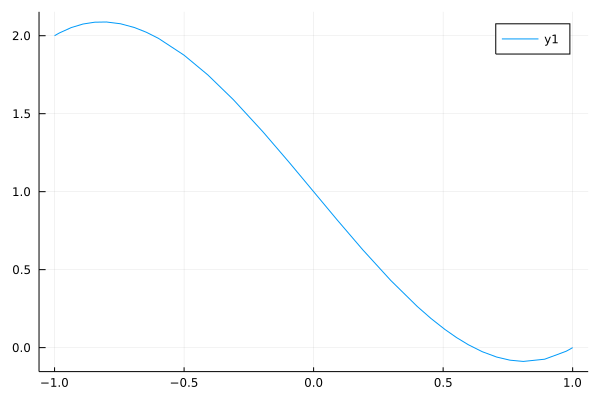

In [4]:
f(x) = x^3 -2x + 1
plot(f,-1,1)

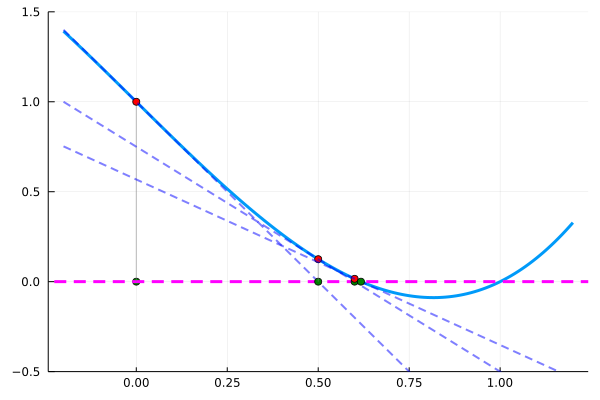

In [5]:
#f(x) = 2x^3 - 2x + 1 #(con un polo doble)
n = 3
x0 = 0.
standard_Newton(f, n, -0.2:0.01:1.2, x0, -0.5, 1.5)

## Tarea: 

### Defina varias funciones y juegue con el método. 
1. Cambie el número de iteraciones y el punto inicial.
2. Pruebe con raices simples y vea desde que puntos el algoritmo convege a cada una. Esa regiones se llaman las bases de atracción de la raíz de este método.
3. Vea que sucede si pone una raíz doble o de orden mayor.

## Un método cercano: el de la secante

Veamos como graficar el mismo y así entenderlo de la misma manera:

In [6]:
function secante(f, n, x_range, x0, x1, ymin=-10, ymax=10)
    l = -2
	p = plot(f, x_range, lw=3, ylim=(ymin, ymax), legend=:false)
    
    hline!([0.0], c="magenta", lw=3, ls=:dash)

	scatter!([x0], [0], c="green", ann=(x0, l, L"x_0", 10))
	scatter!([x1], [0], c="green", ann=(x1, l, L"x_1", 10))
    
	for i in 1:n

		plot!([x0, x0], [0, f(x0)], c=:gray, alpha=0.5)
        plot!([x1, x1], [0, f(x1)], c=:gray, alpha=0.5)
		scatter!([x0], [f(x0)], c=:red)
        scatter!([x1], [f(x1)], c=:red)
        
		m = (f(x1)-f(x0))/(x1-x0)

		plot!(x_range, [straight(x0, f(x0), x, m) for x in x_range], c=:blue, alpha=0.5, ls=:dash, lw=2)

		x2 = x0 - f(x0) / m
		#scatter!([x1], [0], c="green", ann=(x1, -3, "x$i"))

		if i <= n
			scatter!([x2], [0], c="green", ann=(x2, l, L"x_%$(i+1)", 10))
		end
		
		x0 = x1
        x1 = x2
        

	end

	#p |> as_svg
    display(p)

end

secante (generic function with 3 methods)

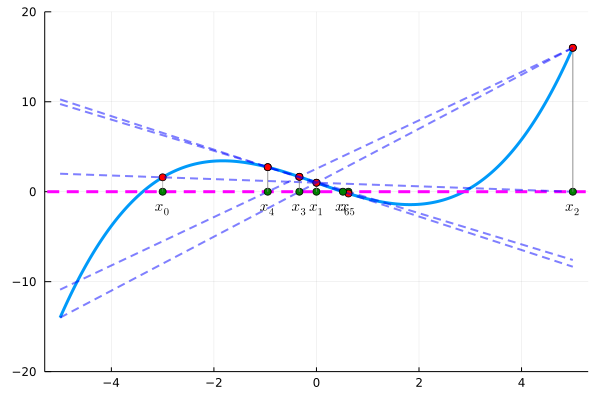

In [7]:

g(x) = 0.2*x^3 - 2x + 1
n = 5
x0 = -3.
x1 = 0.
secante(g, n, -5:0.01:5, x0, x1, -20, 20)

## Tarea: 

### Juegue con el algoritmo de la misma manera que hizo con el anterior.

Le dejamos aquí una función genérica para aplicar el método de Newton-Raphson a funciones de una variable.

In [8]:
tipo = Float64

"""
NR(f::Function,df::Function,x₀::tipo ;
        tolₓ::tipo=tipo(1.e-7),tol_f::tipo=tipo(1.e-7),max_iter::Int64=100
        )
Newto-Raphson method.

Entries:
f = función a la que buscamos su ceros.
df = su derivada
x₀ = punto inicial para iniciar la iteración

Alternativas (fijadas de antemano a dichos valores)
tolₓ = Tolerancia relativa en x, 
tol_f = Tolerancia relativa en f(x)
max_iter = Número máximo de iteraciones

# Examples
```julia-repl
julia> 
h(x) = x^2 - 2
dh(x) = 2x
sol = NR(h,dh,1.)
(5, 1.4142135623730951, 4.440892098500626e-16, [0.3333333333333333, 0.0588235294117647, 0.0017331022530329779, 1.501823965239207e-6, 1.1276535261104996e-12])
sol[2]
scatter(sol[4],yscale=:log10)
```
"""
function NR(f::Function,df::Function,x₀::tipo ;
        tolₓ::tipo=tipo(1.e-7),tol_f::tipo=tipo(1.e-7),max_iter::Int64=100
        )
    x = x₀
    iter = 0
    Er = zeros(max_iter)
    dx = tipo(1.)
    while (abs(dx/x) > tolₓ) || (abs(f(x)) > tol_f)
        iter = iter + 1
        if iter == max_iter
            error("Número máximo de iteraciones alcanzado")
        end
        dx = f(x)/df(x)
        x = x - dx
        Er[iter] = abs(dx/x)
    end
    return (iter, x, f(x), Er[1:iter])
end

NR

In [9]:
h(x) = x^2 -2
dh(x) = 2x

dh (generic function with 1 method)

In [10]:
sol = NR(h,dh,1.)

(5, 1.4142135623730951, 4.440892098500626e-16, [0.3333333333333333, 0.0588235294117647, 0.0017331022530329779, 1.501823965239207e-6, 1.1276535261104996e-12])

In [11]:
sol[1]

5

In [12]:
sol[2]

1.4142135623730951

In [13]:
sol[3]

4.440892098500626e-16

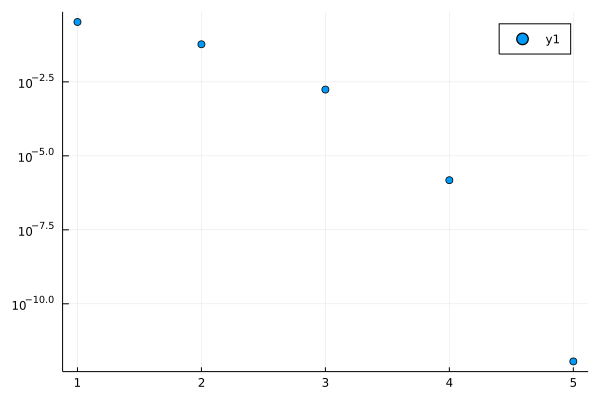

In [14]:
scatter(sol[4],yscale=:log10)

In [15]:
?NR

search: NR LinRange normpath normalize_hue IncrementingODEProblem



NR(f::Function,df::Function,x₀::tipo ;         tolₓ::tipo=tipo(1.e-7),tol*f::tipo=tipo(1.e-7),max*iter::Int64=100         ) Newto-Raphson method.

Entries: f = función a la que buscamos su ceros. df = su derivada x₀ = punto inicial para iniciar la iteración

Alternativas (fijadas de antemano a dichos valores) tolₓ = Tolerancia relativa en x,  tol*f = Tolerancia relativa en f(x) max*iter = Número máximo de iteraciones

# Examples

```julia-repl
julia> 
h(x) = x^2 - 2
dh(x) = 2x
sol = NR(h,dh,1.)
(5, 1.4142135623730951, 4.440892098500626e-16, [0.3333333333333333, 0.0588235294117647, 0.0017331022530329779, 1.501823965239207e-6, 1.1276535261104996e-12])
sol[2]
scatter(sol[4],yscale=:log10)
```
